## Introduction

Using the Car Sale Adverts dataset provided by AutoTrader, this research tries to develop a regression model that can predict the selling price of cars based on numerous parameters. Data preparation, feature engineering, feature selection, dimensionality reduction, model selection, tuning, fitting, assembly, assessment, and analysis are all part of the project. The study intends to find underlying relationships and variations in the data that may affect car pricing by exploring data patterns and conducting association and group differences analysis. This project's findings will have practical ramifications in the automotive industry, and it will provide an opportunity to use transferable skills and traits applicable in both industry and research settings.

### Aims & Goals

	To investigate a dataset of Car Sale Adverts provided by AutoTrader.

	Identifying relevant relationships and developing a regression model capable of predicting car selling prices based on numerous parameters.

	To obtain and analyse data on various aspects that may influence car costs using various data science approaches.

	To identify underlying relationships and changes in data that may influence car prices.

	To develop a better knowledge of the problem at hand and to learn to evaluate the strengths and limits of various models.

	Consolidate knowledge from the Advanced Machine Learning unit by developing a working solution to a real-world, industry-based machine learning challenge.

	To have a tangible impact in the automobile sector by allowing stakeholders to make well-informed purchasing decisions.

### Hypotheses

1. Luxury brands and models command greater prices than economy brands and models, which are strong predictors of car pricing.


2. Mileage and automobile age are negatively connected with selling price, which means that when these parameters grow, so does the price.


3. Cars with unusual or unusual colours (for example, vivid pink or neon green) may have a higher or lower selling price than more typical colours such as black or white.


4. The type of vehicle (e.g., sedan, SUV, truck) has a considerable influence on selling price, with certain types of vehicles being more expensive on average.


## 1. Data Processing for Machine Learning

### 1.1 Import the Dataset and Preview

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade scikit-learn==1.2.2 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
import gradio as gr

In [ ]:
# Import the necessary libraries
import warnings
from sklearn.exceptions import DataConversionWarning
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from functools import partial
rmse = partial(mean_squared_error, squared=False)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import math

In [ ]:
# suppress warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings(action='ignore', category=RuntimeWarning, module='sklearn')
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_palette("viridis")
set_config(display='diagram')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adverts.csv to adverts.csv


In [ ]:
# Load the data
import io
rawdata = pd.read_csv(io.BytesIO(uploaded['adverts.csv']))
rawdata

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol


In [ ]:
# Find the  type of variables

numerical= rawdata.select_dtypes('number').columns

categorical = rawdata.select_dtypes('object').columns

print(f'Numerical Columns:  {rawdata[numerical].columns}')
print('\n')
print(f'Categorical Columns: {rawdata[categorical].columns}')

Numerical Columns:  Index(['public_reference', 'mileage', 'year_of_registration', 'price'], dtype='object')


Categorical Columns: Index(['reg_code', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'fuel_type'],
      dtype='object')


The initial impression of the features are:

   <strong>public_reference</strong> : This is a unique identifier for each vehicle in the dataset. It is a numerical variable.

   <strong>mileage   </strong>: This is the number of miles a vehicle has been driven. It is a numerical variable with a skewed distribution, as most vehicles will have low mileage but a few will have very high mileage.

   <strong>reg_code   </strong>: This is the registration code of the vehicle, which is usually a combination of letters and numbers that identifies the vehicle's make, model, and age. It is a categorical variable.

   <strong>standard_colour   </strong>: This is the standard color of the vehicle. It is categorical variable with a few dominant colors and many rare ones.

  <strong>standard_make   </strong>: This is the make of the vehicle, such as Toyota, Honda, or Ford. It is a categorical variable with a few dominant makes and many rare ones.

  <strong>standard_model   </strong>: This is the model of the vehicle, such as Civic, Corolla, or F-150. It a categorical variable with a few dominant models and many rare ones

  <strong>vehicle_condition   </strong>: This is the overall condition of the vehicle, which may be described as "new," "used," or "certified pre-owned". It is a categorical variable.

  <strong>year_of_registration   </strong>: This is the year in which the vehicle was registered. It is a numerical variable with a skewed distribution, as most vehicles will be relatively new but a few will be very old.

  <strong>price   </strong>: This is the price of the vehicle. It is a numerical variable with a skewed distribution, as most vehicles will be relatively inexpensive but a few will be very expensive.

  <strong>body_type   </strong>: This is the type of body of the vehicle, such as sedan, SUV, or pickup truck. It is a categorical variable with a few dominant body types and many rare ones.

   <strong>crossover_car_and_van   </strong>: This indicates whether the vehicle is a crossover, which is a type of vehicle that combines features of a car and a van. It is a binary categorical variable with values "yes" or "no".,

   <strong>fuel_type   </strong>: This is the type of fuel the vehicle uses, such as gasoline, diesel, or electric. It is a categorical variable with a few dominant fuel types and many rare ones.


### 1.2 Data Exploration


In my data exploration process, I review a sample of the observations to ensure the data has been properly parsed.

In [ ]:
rawdata.shape

(402005, 12)

In [ ]:
rawdata.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
# Check Head, Tail and Sample of data get an overview

In [ ]:
# To get the first 5 rows
rawdata.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
# To get the last 5 rows
rawdata.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [ ]:
rawdata.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


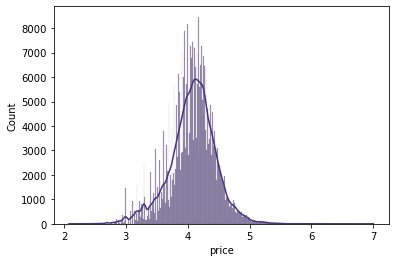

In [ ]:
sns.histplot(np.log10(rawdata['price']), kde=True);

###  1.3 Find Missing Values

In this section, I will find the missing values in the dataset.

In [ ]:
#Get the count and percentage of missing rows in the table

missing_Count = rawdata.isnull().sum().sort_values(ascending=False)
missing_Percentage =    (rawdata.isnull().sum()/rawdata.isnull().count()) .sort_values(ascending=False)
unique_count=rawdata.nunique()
#Concat the output values to return a dataset , setting axis=1 will make it as column
Output = pd.concat([missing_Count, missing_Percentage, unique_count], axis=1,
                   keys=['Missing_Count', 'Missing_Percentage', 'Unique_Count'])
Output

,Missing_Count,Missing_Percentage,Unique_Count
year_of_registration,33311,0.082862,84
reg_code,31857,0.079245,72
standard_colour,5378,0.013378,22
body_type,837,0.002082,16
fuel_type,601,0.001495,9
mileage,127,0.000316,80634
public_reference,0,0.000000,402005
standard_make,0,0.000000,110
standard_model,0,0.000000,1168
vehicle_condition,0,0.000000,2


In [ ]:
# Find the Range of price,
print("Range between  "+ str(rawdata['price'].min()) +"and  "+str(rawdata['price'].max()))
print("")
print("")
# Find the mean, median, and mode of the prices
print("Centrality: ")
print(" Mean: "+str(rawdata['price'].mean()))
print("  Median :"  + str(rawdata['price'].median()))
print("  Mode : "+str(rawdata['price'].mode()))
print("")
print("")
# Find the variance and standard deviation of the prices
print("Dispersion : ")
print("  variance :  "+ str(rawdata['price'].var()))
print("  standard deviation : "+ str(rawdata['price'].std()))

Range between  120and  9999999


Centrality: 
 Mean: 17341.965798932848
  Median :12600.0
  Mode : 0    8995
Name: price, dtype: int64


Dispersion : 
  variance :  2156437779.54298
  standard deviation : 46437.46095064824


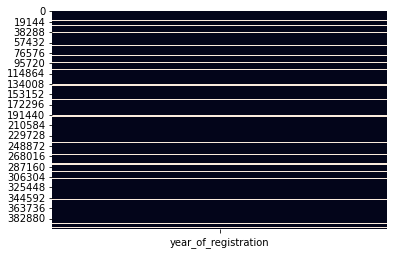

In [ ]:
# create a heatmap for missing values
sns.heatmap(rawdata[["year_of_registration"]].isnull(), cbar=False)

# show the plot
plt.show()

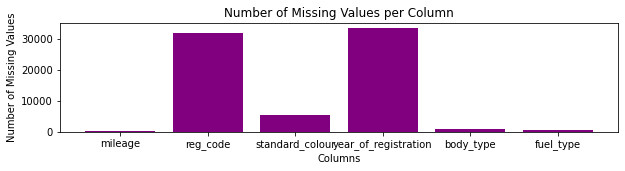

In [ ]:
# Calculate the number of missing values in each column
missing = rawdata.isnull().sum()
# Remove columns with 0 missing values
missing = missing[missing> 0]
missing
# Create a bar chart
plt.figure(figsize=(10,2))
plt.bar(missing.index, missing.values,color="purple")
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values per Column')
plt.show()

###  1.4 Find Outliers and Noise

In this section, we will be examining the identification and treatment of outliers and noise in our dataset.

<AxesSubplot:xlabel='year_of_registration', ylabel='price'>

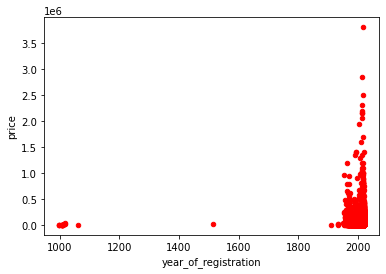

In [ ]:
# The scatterplot for year and price
rawdata.plot.scatter(x = 'year_of_registration', y = 'price',c = 'red')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='mileage', ylabel='price'>

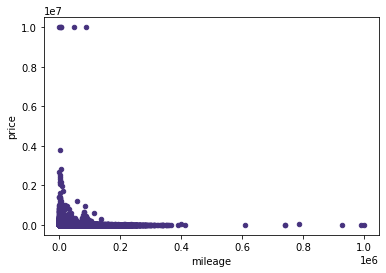

In [ ]:
# The scatterplot for mileage and price
rawdata.plot.scatter(x = 'mileage', y = 'price')

## 2. Data Processing

Preprocessing data is a key phase in any data analysis project. It involves a series of techniques to clean and organize the data for further analysis. One of the important steps in data preprocessing is dealing with <strong> missing and unusual values</strong>. Missing values can appear when data is not recorded or collected correctly and can lead to inaccuracies in the analysis if not handled properly. Unusual values, also known as <strong>outliers</strong>, are data points that are significantly different from the rest of the data. These values can also cause issues in analysis if not dealt with correctly.

In [ ]:
#  Count of missing values
rawdata.isnull().sum().sort_values(ascending=False)

year_of_registration     33311
reg_code                 31857
standard_colour           5378
body_type                  837
fuel_type                  601
mileage                    127
public_reference             0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
crossover_car_and_van        0
dtype: int64

#### 2.1 Handling Missing Values

In [ ]:
#To replace all non-integer values with 0 in a column of a pandas DataFrame,
#you can use the to_numeric() function with the errors parameter set to 'coerce'. This will convert all non-integer values to NaN, which you can then replace with 0 using the fillna() function.
# Convert the 'c' column to numeric, replacing non-integer values with NaN
rawdata['reg_code'] = pd.to_numeric(rawdata['reg_code'], errors='coerce')

# Replace NaN values with 0
rawdata['reg_code'] = rawdata['reg_code'].fillna(0)

In [ ]:
# Function definition to calculate the year of registration from registration code with 3 input
#I check for the vehicle type , so the NEW vehicles wont get affected
# The year is calculated based on the reg_code with a mathematical calculation


def find_year_from_regdate(year,regcode,vehicle_condition):
    if(vehicle_condition.lower()!="new"):
        if math.isnan(year):
            if 0< regcode < 23 :
                outyear = int(regcode)+2000
            elif regcode>=23:
                outyear = int(regcode)+1950
            else:
                  outyear=year
        else :
            outyear=year
    else :
            outyear=year
    return outyear

In [ ]:
# filter the DataFrame to only include rows with the specified make and model
# if there are no rows that match the specified make and model, return None
# if there are no rows that match the specified make and model, return None

def get_fuel_type( make, model,fuel_type):
    if(pd.isnull(fuel_type)):
        df = rawdata[(rawdata['standard_make'] == make) & (rawdata['standard_model'] == model)]
        dfcol = df["fuel_type"].loc[df["fuel_type"].notna()]
        if dfcol.shape[0] == 0:
            outval=rawdata["fuel_type"].mode().iloc[0]
        else:
            outval=dfcol.iloc[0]
    else:
        outval=fuel_type

    return outval

In [ ]:
# filter the DataFrame to only include rows with the specified make and model
# if there are no rows that match the specified make and model, return None
# if there are no rows that match the specified make and model, return None

def get_body_type( make, model,body_type):
    if(pd.isnull(body_type)):
        df = rawdata[(rawdata['standard_make'] == make) & (rawdata['standard_model'] == model)]
        dfcol = df["body_type"].loc[df["body_type"].notna()]
        if dfcol.shape[0] == 0:
            outval=rawdata["body_type"].mode().iloc[0]
        else:
            outval=dfcol.iloc[0]
    else:
        outval=body_type

    return outval

In [ ]:
def get_mileage( make, model,mileage,vehicle_condition):

    if(vehicle_condition.strip().lower()=="used"):
        if(pd.isnull(mileage) or mileage==0):
            df = rawdata[(rawdata['standard_make'] == make) & (rawdata['standard_model'] == model)]
            outval = np.mean(df.mileage)
            if(outval==np.nan):
                outval = np.mean(rawdata.mileage)
        else:
            outval=mileage
    else:
        outval=mileage


    return outval

#### 2.2 Handling Missing Values

outliers should be identified through the use of visualization, statistical analysis, or summary statistics, and a suitable approach to handling them, such as removing them, transforming the data, or leaving them as is, should be implemented.

<Axes: xlabel='year_of_registration', ylabel='price'>

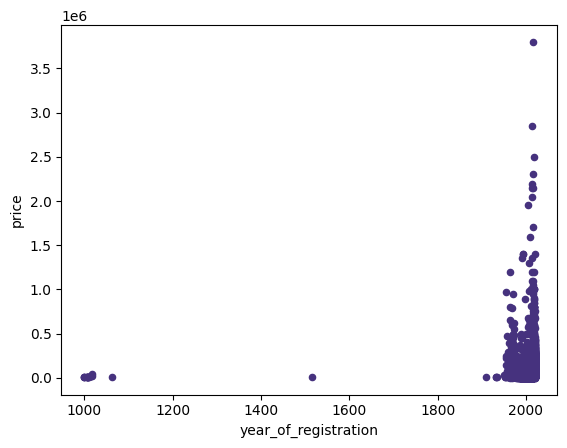

In [ ]:
# scatterplot for year_of_registration vs price
rawdata.plot.scatter(x = 'year_of_registration', y = 'price')

<Axes: xlabel='mileage', ylabel='price'>

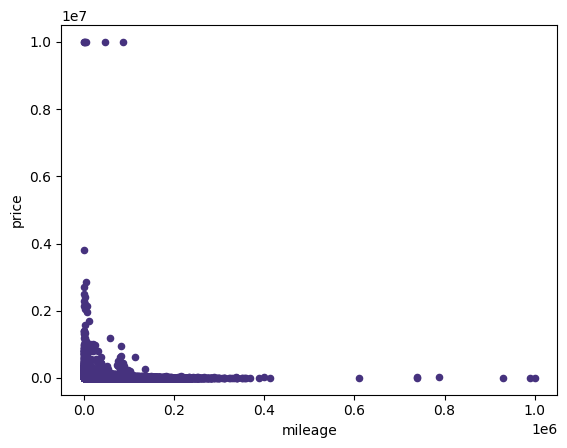

In [ ]:
# scatterplot for mileage vs price
rawdata.plot.scatter(x = 'mileage', y = 'price')

<Axes: xlabel='mileage', ylabel='price'>

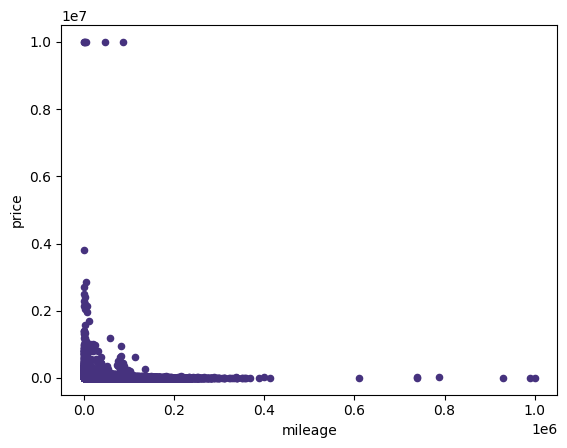

In [ ]:
#try deleting the outliers and plot that
#rawdata= rawdata[rawdata["mileage"]<299990]
rawdata.plot.scatter(x = 'mileage', y = 'price')

In [ ]:
# set the default color cycle to a list of colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['r', 'g', 'b', 'c'])


In [ ]:
# Check the shape of data after removing missing values and outliers
rawdata.shape

(402005, 12)

In [ ]:
class HandleMissingValuesOutlierNumericalTransformer():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        global rawdata
        rawdata['year_of_registration'] =rawdata.apply(lambda x:find_year_from_regdate((x['year_of_registration']),
                                                             (x['reg_code']),(x['vehicle_condition'])), axis=1)
        rawdata["mileage"] = rawdata.apply(lambda x: get_mileage((x['standard_make']),(x['standard_model']),(x['mileage']),
                                                         (x['vehicle_condition'])), axis=1)

        #Remove the outliers in year of registration less than 1950
        rawdata=rawdata.drop(rawdata[((rawdata['vehicle_condition']=="USED") &
                 ((rawdata['year_of_registration']<1950)  | (rawdata['year_of_registration']> 2020)))].index)

        rawdata=rawdata.drop(rawdata[(rawdata['year_of_registration'].isna()) & (rawdata['vehicle_condition'] == "USED")].index)
        # Remove the NAN values in Mileage where the vehicle condition is USED

        rawdata=rawdata.drop(rawdata[(rawdata['mileage'].isna()) & (rawdata['vehicle_condition'] == "USED")].index)
        rawdata= rawdata[rawdata["mileage"]<299990]

        # Remove the NAN values in Mileage where the vehicle condition is USED
        rawdata=rawdata.drop(rawdata[(rawdata['mileage'].isna()) & (rawdata['vehicle_condition'] == "USED")].index)

        rawdata['year_of_registration'].fillna(2020, inplace=True)

        return rawdata;

In [ ]:
class HandleMissingValuesOutlierCategoricalTransformer():

    def __init__(self):
        pass

    def fit(self, X,y=None):
        return self

    def transform(self, X):
        global rawdata

        rawdata["fuel_type"] = rawdata.apply(lambda x: get_fuel_type((x['standard_make']),(x['standard_model']),
                                                             (x['fuel_type'])), axis=1)

        rawdata["body_type"] = rawdata.apply(lambda x: get_body_type((x['standard_make']),(x['standard_model']),
                                                             (x['body_type'])), axis=1)

        rawdata["standard_colour"]=rawdata["standard_colour"].fillna(rawdata["standard_colour"].mode().iloc[0])

        return rawdata;

## Encoding

Hypothesis: Certain combinations of category characteristics may have a greater impact on the estimated selling price than individual variables alone, according to the dataset. One-hot encoding would be appropriate for categorical variables with a small number of unique values, such as "body_type" with just 16 distinct values. One-hot encoding, on the other hand, would result in a significant number of extra columns for categorical variables with a large number of unique values, such as "standard_model" with 1168 unique values, which may result in the curse of dimensionality. Label encoding may be more appropriate in such instances.

	I used label encoding on the 'standard_make,' 'standard_model', and 'standard_colour' columns because they have a significant number of unique values and label encoding can assist minimise data dimensionality.

	For the 'body_type' and 'fuel_type' columns, I utilised one hot encoding because these columns have a small number of unique values, and one hot encoding can help capture the category information without sacrificing any information.


### One - hot Encoding

Certain combinations of category characteristics may have a greater impact on the estimated selling price than individual variables alone, according to the dataset. We can capture these combinations and perhaps increase the performance of our machine-learning models by employing one-hot encoding.

### Target Encoding

A method for transforming category variables into numerical values based on the target variable is called target encoding. Target encoding considers the association between the categorical variable and the target variable as opposed to label encoding, which gives each category a numerical value.
Target encoding includes substituting the average value of the target variable for each category in the categorical variable. This implies that the average value of the target variable for each category is replaced with a numerical number.

### 2.3 Feature Prepossessing Pipeline

In [ ]:
print(rawdata.columns)

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')


#### 1.  Power Transform for Mileage

Power transformation is a technique used to transform data to make it more normally distributed. In the context of machine learning, it can be useful to apply a power transform to certain features, such as mileage, to help improve the performance of models that assume normally distributed data. This is because many machine learning algorithms, such as linear regression and logistic regression, rely on the assumption of normally distributed data. By transforming the data to have a more normal distribution, we can improve the performance of these models

#### 2. Convert the data type by replacing the values

Converting the feature type is a process of changing the format or data type of a feature to make it more compatible with certain data analysis tools or models. For example, in this case, the vehicle condition feature has two distinct values, "NEW" or "USED", which may be more easily represented numerically. This conversion can be done by replacing "NEW" with 1 and "USED" with 0

#### 3. Calculate the vehicle age from year of registration
#One of the most common feature engineering methods is to create new features that are the linear / polynomial combination of the existing ones. This becomes useful for providing more information to a predictive model to improve its performance.

#### 4. Remove unwanted features

Remove the features that are already encoded.

In [ ]:
class FeatureEngineeringPreprocessing():

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        global rawdata

        mileage_df = rawdata[['mileage']]
        pt = PowerTransformer()
        mileage_df_pt = pt.fit_transform(mileage_df)
        rawdata['mileage_pt']=mileage_df_pt
        # drop the original categorical columns
        #rawdata.drop(columns=["mileage"], inplace=True)

        #Convert the data type by replacing the values
        rawdata['vehicle_condition'] = rawdata['vehicle_condition'].replace({'NEW': 1, 'USED': 0})

        #Calculate the vehicle age from year of registration
        rawdata['vehicle_age'] =datetime.datetime.now().year- rawdata['year_of_registration']

        rawdata.loc[rawdata['year_of_registration'].isnull(), 'vehicle_age'] = 0

        #Since all values are unnecessary - will drop the column
        rawdata = rawdata.drop(labels=['reg_code',"public_reference","year_of_registration"], axis=1)

        return rawdata;

### Rescale the Data

#### Hypothesis
 Rescaling the data using standardization or min-max scaling can improve the performance of machine learning models by ensuring that all features are on the same scale, thereby preventing certain features from dominating others. I tried both MinMaxScaler and StandardScaler and found MinMax have better performance on models.

#### Analysis
    “ If the data has a normal distribution and a relatively small range, then standardization (Z-score normalization) can be a good option. If the data has a wide range and does not have a normal distribution, then Min-Max Scaling may be more appropriate.”


## Feature Engineering

Text(0, 0.5, 'mileage')

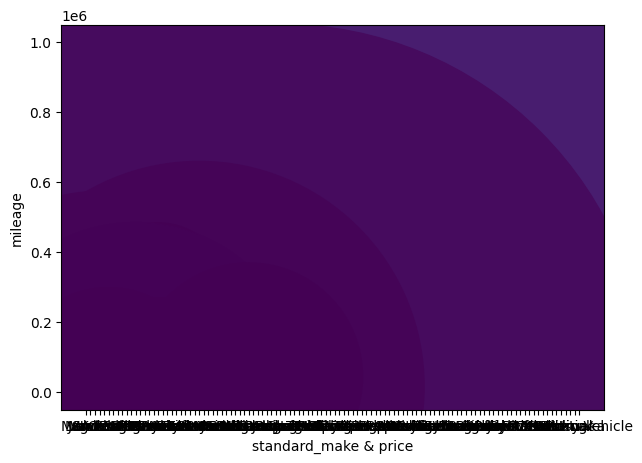

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))
ax.scatter(rawdata['standard_make'],rawdata['mileage'],s=rawdata['price'],c=rawdata['price']);
ax.set_xlabel('standard_make & price');
ax.set_ylabel('mileage')

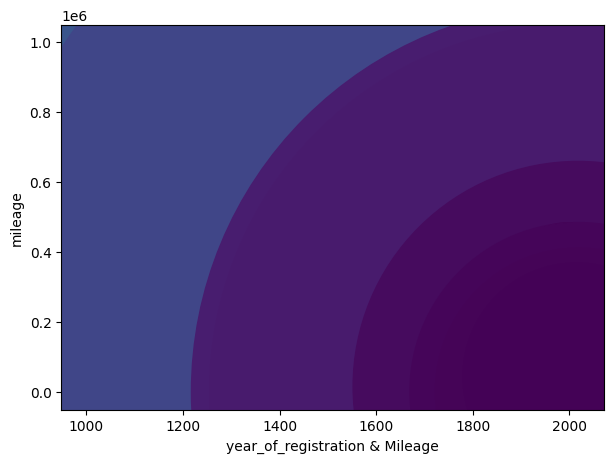

In [ ]:

fig,ax=plt.subplots(figsize=(7,5))
ax.scatter(rawdata['year_of_registration'],rawdata['mileage'],s=rawdata['price'],c=rawdata['price']);
ax.set_xlabel('year_of_registration & Mileage');
ax.set_ylabel('mileage');

Before separating the data, I used some feature engineering approaches to improve the dataset's quality. First, I used Power Transformation on the Mileage feature to convert the data to a normal distribution. I transformed the "USED/NEW" feature to aid in the data's simplicity for simpler interpretation and visualisation. Computed the age of each vehicle in the dataset. This additional element aided in better understanding the relationship between the vehicle's age. Removed the features that were no longer relevant for modelling. Finally, I tested the impact of various scaling approaches, such as MinMax and Standardisation, on the performance of machine learning models. To guarantee that the generated subsets were representative of the original dataset, all of these pre-processing stages were conducted before splitting the data into train, validation, and test sets.

With the insights I obtained from the Machine Learning project I did last semester and research in the Auto resale industry; I was able to identify the most important features for the project. Based on my previous experience, I have chosen standard make, body type, mileage, and vehicle age as the most relevant features for this dataset. I felt all these features are interdependent.


In [ ]:
preprocessor = Pipeline(
    steps=[
        ("Custom_imputer_Num", HandleMissingValuesOutlierCategoricalTransformer()),
        ("Custom_imputer_cat", HandleMissingValuesOutlierNumericalTransformer()),
        ("feature_preprocessing", FeatureEngineeringPreprocessing())
    ]
)
preprocessor

Pipeline(steps=[('Custom_imputer_Num',
                 <__main__.HandleMissingValuesOutlierCategoricalTransformer object at 0x7ff40cdb2d70>),
                ('Custom_imputer_cat',
                 <__main__.HandleMissingValuesOutlierNumericalTransformer object at 0x7ff40cdb29e0>),
                ('feature_preprocessing',
                 <__main__.FeatureEngineeringPreprocessing object at 0x7ff4103d8e20>)])

In [ ]:
rawdata= preprocessor.fit_transform(rawdata)

In [ ]:
#  Count of missing values
rawdata.isnull().sum().sort_values(ascending=False)

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
mileage_pt               0
vehicle_age              0
dtype: int64

### Data Sampling
We have many data sampling techniques including Simple random sampling, Stratified sampling, Cluster sampling, Systematic sampling, and Multi-stage sampling.

I chose to use Stratified sampling beacuase , when subsetting ou data, stratified sampling is a suitable technique to ensure representation from all standard car makes. This technique allows to divide the dataset into groups based on make, and then select a specified number of observations from each group

In [ ]:
# Divide the dataset into groups based on standard_make
Sampled_vehicles_Group = rawdata.groupby('standard_make')

# Select 50 observations from each group
Sampled_vehicles_df = pd.concat([a.sample(3000,random_state=0,replace=True) for _, a in Sampled_vehicles_Group])

# Shuffle the DataFrame by row
Sampled_vehicles_df = Sampled_vehicles_df.iloc[np.random.permutation(len(Sampled_vehicles_df))]

# Reset the index of the shuffled DataFrame
Sampled_vehicles_df = Sampled_vehicles_df.reset_index(drop=True)

In [ ]:
Sampled_vehicles_df

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,crossover_car_and_van,fuel_type,mileage_pt,vehicle_age
0,46000.0,Silver,Noble,M12,0,42980,Coupe,False,Petrol,0.520446,20.0
1,12500.0,Maroon,Sebring,MXR,0,26000,Convertible,False,Petrol,-0.478331,15.0
2,35000.0,Black,Morgan,Plus Eight,0,34995,Convertible,False,Petrol,0.269622,27.0
3,24080.0,Blue,Toyota,Auris,0,7950,Hatchback,False,Petrol,-0.035234,9.0
4,0.0,Grey,Volkswagen,Golf,1,24841,Hatchback,False,Petrol,-2.054485,3.0
...,...,...,...,...,...,...,...,...,...,...,...
323995,195668.0,White,Buick,Riviera,0,7500,Saloon,False,Petrol,2.364055,4.0
323996,33325.0,White,Audi,A1,0,12000,Hatchback,False,Petrol,0.227218,7.0
323997,58000.0,Grey,Maybach,62,0,79995,Limousine,False,Petrol,0.753846,15.0
323998,117250.0,Black,Lancia,Delta,0,49995,Hatchback,False,Petrol,1.597562,26.0


###  Split the Data

Model building is the crucial step of creating a machine learning model that can be utilized to forecast or decide based on input data in a machine learning project.


Data preparation: This step involves preparing the data by cleaning, transforming, and preprocessing it so that it can be used in the model building process.

Splitting the data: The data is divided into two sets: training, and testing. The model is trained on the training set, its performance is evaluated on the validation set and final evaluation is done on the test set.

The data will be divided into three. Usualy 60% of data will be used for Train , 20% will be used for testingand 20% will be used for Validation.
We need to seperate the target and predictor variables before we do the splitting

In [ ]:
# Define the target variable and the features
target='price'

X,y=Sampled_vehicles_df.drop(columns=target),Sampled_vehicles_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Encode the Data

In [ ]:
numeric_features = X.select_dtypes(exclude='object').columns.tolist()
print(numeric_features)
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
    ]
).set_output(transform='pandas')

categorical_features_1 = ["fuel_type", "body_type"]
print(categorical_features_1)
categorical_transformer_1 = Pipeline(
    steps=[
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False, drop='if_binary')),
    ]
).set_output(transform='pandas')

categorical_features_2 = ["standard_make", "standard_model"]
if "standard_colour" in X.columns:
    categorical_features_2.append("standard_colour")
print(categorical_features_2)

categorical_transformer_2 = Pipeline(
    steps=[("target", ce.TargetEncoder())]
).set_output(transform='pandas')

feature_engg_transformer = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat_1", categorical_transformer_1, categorical_features_1),
        ("cat_2", categorical_transformer_2, categorical_features_2),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False

).set_output(transform="pandas")

feature_engg_transformer


['mileage', 'vehicle_condition', 'crossover_car_and_van', 'mileage_pt', 'vehicle_age']
['fuel_type', 'body_type']
['standard_make', 'standard_model', 'standard_colour']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['mileage', 'vehicle_condition',
                                  'crossover_car_and_van', 'mileage_pt',
                                  'vehicle_age']),
                                ('cat_1',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['fuel_type', 'body_type']),
                                ('cat_2',
                                 Pipeline(steps=[('target', TargetEncoder())]),
                                 ['standard_make', 'standard_model',
                                  'standard_colour'])],
                  verbose_feature_names_out=False)

In [ ]:
rawdata_fea=feature_engg_transformer.fit_transform(X_train,y_train)
rawdata_fea.head()

,mileage,vehicle_condition,crossover_car_and_van,mileage_pt,vehicle_age,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,...,body_type_MPV,body_type_Minibus,body_type_Panel Van,body_type_Pickup,body_type_SUV,body_type_Saloon,body_type_Window Van,standard_make,standard_model,standard_colour
212936,-0.113062,-0.232259,-0.187878,0.271336,0.129740,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42841.155770,36436.579036,34305.881267
261889,1.061375,-0.232259,-0.187878,1.103008,3.043134,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9000.000000,9000.000000,20994.267904
214723,-0.346995,-0.232259,-0.187878,0.022421,-0.425192,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23027.610893,29995.000000,176922.511295
48702,-0.935408,-0.232259,-0.187878,-1.502315,-0.772025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25721.422511,20595.474684,68553.224519
241299,-0.787051,-0.232259,-0.187878,-0.725335,-0.772025,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20756.539370,14919.988077,176922.511295


In [ ]:
from sklearn.model_selection import KFold

# Model Evaluation & Analysis

In [ ]:
# apply the analysis of PDP to get the final model.

In [ ]:
Xf,yf = rawdata.drop(columns='price'), rawdata['price']
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(Xf):

    Xf_train, Xf_test = Xf.iloc[train_index], Xf.iloc[test_index]
    yf_train, yf_test = yf.iloc[train_index], yf.iloc[test_index]

In [ ]:
#Creating one pipeline for all models:

def create_def_preprocessing_pipe(X):
    preprocessor = Pipeline(
        steps=[
            ('feature_engg_transformer',feature_engg_transformer),
            ("featsel", SelectKBest(f_regression, k=8))
        ]
        ).set_output(transform='pandas')
    return preprocessor

In [ ]:
def create_regr_pipe(est, X):
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_def_preprocessing_pipe(X)),
            ("regr", est)
        ]
    ).set_output(transform="pandas")
    return regr_pipe

In [ ]:
gbr = create_regr_pipe(xgb.XGBRegressor(), Xf_train)

In [ ]:
rfr = create_regr_pipe(xgb.XGBRegressor(), Xf_train)

In [ ]:
# Create a VotingRegressor ensemble
voter = VotingRegressor(estimators=[("gbr", gbr), ("rfr", rfr)])
voter.fit(Xf_train, yf_train)

VotingRegressor(estimators=[('gbr',
                             Pipeline(steps=[('pp',
                                              Pipeline(steps=[('feature_engg_transformer',
                                                               ColumnTransformer(remainder='passthrough',
                                                                                 transformers=[('num',
                                                                                                Pipeline(steps=[('scaler',
                                                                                                                 StandardScaler())]),
                                                                                                ['mileage',
                                                                                                 'vehicle_condition',
                                                                                                 'crossover_car_and_van',
                                                                                                 'mileage_pt',
                                                                                                 'vehicle_age']),
                                                                                               ('cat_1',
                                                                                                Pipeline(steps=[('ohe',
                                                                                                                 OneHotEncoder(drop='if_b...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...))]))])

In [ ]:
Xf_train

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type,mileage_pt,vehicle_age
0,0.0,Grey,Volvo,XC90,1,SUV,False,Petrol Plug-in Hybrid,-2.054485,3.0
1,108230.0,Blue,Jaguar,XF,0,Saloon,False,Diesel,1.490253,12.0
2,7800.0,Grey,SKODA,Yeti,0,SUV,False,Petrol,-0.737127,6.0
3,45000.0,Brown,Vauxhall,Mokka,0,Hatchback,False,Diesel,0.499330,7.0
4,64000.0,Grey,Land Rover,Range Rover Sport,0,SUV,False,Diesel,0.859137,8.0
...,...,...,...,...,...,...,...,...,...,...
321599,23827.0,Black,Smart,forfour,0,Hatchback,False,Petrol,-0.043251,7.0
321600,3083.0,Grey,Audi,Q2,0,SUV,False,Petrol,-1.132395,3.0
321601,9230.0,Black,Land Rover,Discovery Sport,0,SUV,False,Diesel,-0.649854,5.0
321602,27841.0,Grey,Audi,A3,0,Hatchback,False,Diesel,0.078128,7.0


In [ ]:
yf_train

0         73970
1          7000
2         14000
3          7995
4         26995
          ...  
321599     6299
321600    24950
321601    32000
321602    12495
321603     4999
Name: price, Length: 321260, dtype: int64

In [ ]:
# Create a DataFrame with the input data
input_data = pd.DataFrame(
    [[14000.0,	"Silver",	"Audi",	"A4 Avant" ,0,	"Estate",	False	,"Diesel",	-0.409167,	9.0]],
    columns=["mileage",	"standard_colour"	,"standard_make",	"standard_model",	"vehicle_condition",	"body_type",	"crossover_car_and_van",	"fuel_type",	"mileage_pt",	"vehicle_age"]
)

# Perform the prediction using the voter model
prediction = voter.predict(input_data)[0]

print("Predicted Car Price:", prediction)


Predicted Car Price: 13196.997


# Gradio

In [ ]:
import pandas as pd
import gradio as gr
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Create input components for Gradio
mileage_input = gr.inputs.Number(label="Mileage")
standard_colour_input = gr.inputs.Textbox(label="Standard Colour")
standard_make_input = gr.inputs.Textbox(label="Standard Make")
standard_model_input = gr.inputs.Textbox(label="Standard Model")
vehicle_condition_input = gr.inputs.Number(label="Vehicle Condition")
body_type_input = gr.inputs.Textbox(label="Body Type")
crossover_car_and_van_input = gr.inputs.Checkbox(label="Crossover Car and Van")
fuel_type_input = gr.inputs.Textbox(label="Fuel Type")
vehicle_age_input = gr.inputs.Number(label="Vehicle Age")

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:1

In [ ]:
# Initialize the power transformer
power_transformer = PowerTransformer()

In [ ]:
# Fit the power transformer on the training data X_train
power_transformer.fit(X_train[['mileage']])

PowerTransformer()

In [ ]:


# Create a function for car price prediction
def predict_car_price(mileage, standard_colour, standard_make, standard_model, vehicle_condition,
                      body_type, crossover_car_and_van, fuel_type, vehicle_age):
    # Power transform the mileage
    mileage_pt = power_transformer.transform([[mileage]])[0][0]

    # Create a DataFrame with the input data
    input_data = pd.DataFrame(
        [[mileage, standard_colour, standard_make, standard_model, vehicle_condition,
          body_type, crossover_car_and_van, fuel_type, mileage_pt, vehicle_age]],
        columns=["mileage", "standard_colour", "standard_make", "standard_model",
                 "vehicle_condition", "body_type", "crossover_car_and_van",
                 "fuel_type", "mileage_pt", "vehicle_age"]
    )

    # Perform the prediction using the voter model
    prediction = voter.predict(input_data)[0]

    return prediction


In [ ]:

# Combine input components into a list
inputs = [mileage_input, standard_colour_input, standard_make_input, standard_model_input,
          vehicle_condition_input, body_type_input, crossover_car_and_van_input,
          fuel_type_input, vehicle_age_input]


In [ ]:
# Customize the interface with theme and styling
iface = gr.Interface(fn=predict_car_price, inputs=inputs, outputs="text", title="Car Price Predictor",
                     theme="huggingface", layout="vertical", description="Predict the price of a car")


/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:679: UserWarning: Cannot load huggingface. Caught Exception: The space huggingface does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")
<ipython-input-119-92dd39a5874a>:2: UserWarning: `layout` parameter is deprecated, and it has no effect
  iface = gr.Interface(fn=predict_car_price, inputs=inputs, outputs="text", title="Car Price Predictor",


In [ ]:
# Set custom CSS properties for styling
css = """
body {
    background-image: url(uploaded[Flowchart Template.jpg]);
    background-size: cover;
    background-repeat: no-repeat;
    background-position: center center;
}

.gradio-interface {
    background-color: rgba(255, 255, 255, 0.8);
    border-radius: 10px;
    padding: 20px;
}

.gradio-input-group label {
    color: #000000;
}

.gradio-button {
    background-color: #FF0000;
    color: #FFFFFF;
    border-radius: 5px;
}

.gradio-input[type="checkbox"]:checked + .gradio-button {
    background-color: #00FF00;
}
"""

In [ ]:
iface = gr.Interface(fn=predict_car_price, inputs=inputs, outputs="text",output_title="Predicted Data" , title="Car Price Predictor",flag=False,
                      description="Predict the price of a car based on various features such as mileage, make, model, vehicle condition, and more. Get accurate predictions for car prices using our advanced machine learning model.",
                      allow_flagging="never")

<ipython-input-151-1001cd506063>:1: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'output_title': 'Predicted Data', 'flag': False}
  iface = gr.Interface(fn=predict_car_price, inputs=inputs, outputs="text",output_title="Predicted Data" , title="Car Price Predictor",flag=False,


In [ ]:
# Launch the interface
iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>